In [71]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv ("spam.csv", encoding = "ISO-8859-1")

In [7]:
df.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5     spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6      ham  Even my brother is not like to speak with me. ...        NaN   
7      ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8     spam  WINNER!! As a valued network customer you have...        NaN   
9     spam  Had your mobile 11 months or more? U R entitle...        NaN   
10     ham  I'm gonna be home soon and i don't want to tal...        NaN   
11    spam  SIX chances to win CASH! From 100 to 20,000 po

In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [12]:
df = df.drop (["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [14]:
df.columns = ["Labels", "Data"]

In [17]:
df ["b_labels"] = df ["Labels"].map ({"ham" : 0, "spam" : 1})

In [30]:
Y = df ["b_labels"].as_matrix ()

/home/dishebh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [31]:
X = df ["Data"]

In [32]:
count_vectorizer = CountVectorizer (decode_error = "ignore")
X = count_vectorizer.fit_transform (df ["Data"])

In [33]:
X

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [35]:
Y.shape

(5572,)

In [36]:
X.shape

(5572, 8672)

In [40]:
X [5, 1000]

0

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.33)

In [50]:
model = MultinomialNB ()

In [52]:
model.fit (X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
print ("Train score : ", model.score (X_train, Y_train))

Train score :  0.993570854540584


In [54]:
print ("Test Score : ", model.score (X_test, Y_test))

Test Score :  0.977705274605764


In [55]:
#Visualising the data

In [72]:
def visualize (Label) :
    
    words = ''
    for msg in df [df ["Labels"] == Label]["Data"] :
        msg = msg.lower ()
        words += msg
        
    wordcloud = WordCloud (width = 600, height = 400).generate (words)
    plt.imshow (wordcloud)
    plt.axis ('off')
    plt.show ()

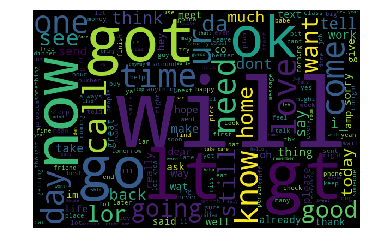

In [73]:
visualize ('ham')

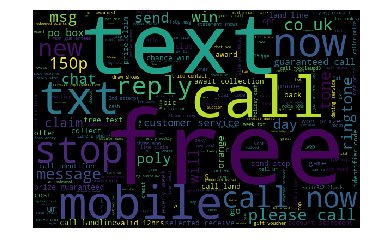

In [74]:
visualize ('spam')

In [56]:
df ["Predictions"] = model.predict (X)

In [62]:
sneaky_spams = df [(df ["Predictions"] == 0) & (df ["b_labels"] == 1)]["Data"]

In [63]:
for msg in sneaky_spams :
    print (msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
0A$NETWORKS allow companies to bill for SMS, so they are responsible for their \suppliers\"
Would you like to see my XXX pics they ar

In [64]:
not_actually_spam = df [(df ["Predictions"] == 1) & (df ["b_labels"] == 0)]["Data"]

In [65]:
for msg in not_actually_spam :
    print (msg)

No calls..messages..missed calls
Hey company elama po mudyadhu.
No calls..messages..missed calls
Waiting for your call.
\Pete can you please ring meive hardly gotany credit\""
Gibbs unsold.mike hussey
Oi. Ami parchi na re. Kicchu kaaj korte iccha korche na. Phone ta tul na. Plz. Plz.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
U WILL SWITCH YOUR FONE ON DAMMIT!!
S..antha num corrct dane
No calls..messages..missed calls
Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.
Boy; I love u Grl: Hogolo Boy: gold chain kodstini Grl: Agalla Boy: necklace madstini Grl: agalla Boy: Hogli 1 mutai eerulli kodthini! Grl: I love U kano;-)
\CHEERS U TEX MECAUSE U WEREBORED! YEAH OKDEN HUNNY R UIN WK SAT?SOUNDåÕS LIKEYOUR HAVIN GR8FUN J! KEEP UPDAT COUN